In [7]:
%matplotlib inline 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def df_dt(x, t, a, b, c, d):
    """Función del sistema en forma canónica"""
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])

# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 40   # Presas
y0 = 9    # Depredadores
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

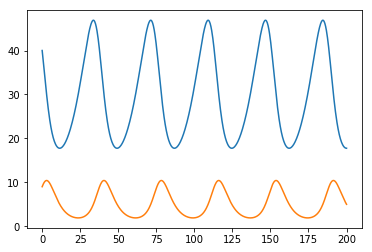

In [9]:
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')

C:\Users\Diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


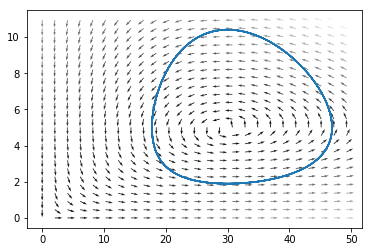

In [10]:
x_max = np.max(solucion[:,0]) * 1.05
y_max = np.max(solucion[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.plot(solucion[:, 0], solucion[:, 1])

NameError: name 'constant' is not defined

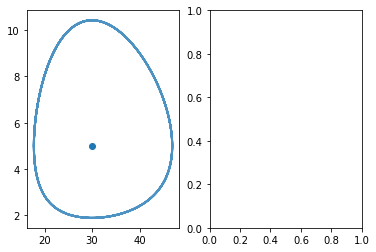

In [11]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x

fig, ax = plt.subplots(1,2)

ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].scatter(c/d, a/b)
levels = (0.5, 0.6, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.775, 0.78, 0.781)
ax[0].contour(xx, yy, constant, levels, colors='blue', alpha=0.3)

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')